# <a id='toc1_'></a>[Rozdział 7. Interpolacja i aproksymacja](#toc0_)

**Table of contents**<a id='toc0_'></a>    
- [Rozdział 7. Interpolacja i aproksymacja](#toc1_)    
  - [Wielomiany](#toc1_1_)    
  - [Interpolacja i aproksymacja wielomianowa](#toc1_2_)    
  - [Interpolacja i aproksymacja dowolną krzywą](#toc1_3_)    
  - [Interpolacja funkcjami sklejanymi](#toc1_4_)    
  - [Interpolacja funkcji wielu zmiennych](#toc1_5_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

**Libraries:**

- [NumPy](https://numpy.org/)
- [SymPy](https://www.sympy.org/en/index.html)
- [Matplotlib](https://matplotlib.org/)
- [SciPy](https://scipy.org/)

In [1]:
import matplotlib.pyplot as plt

import numpy as np
from numpy import polynomial as P

from scipy import interpolate
from scipy import linalg
from scipy import optimize

## <a id='toc1_1_'></a>[Wielomiany](#toc0_)

In [2]:
p1 = P.Polynomial([1,2,3])
p1

Polynomial([1., 2., 3.], domain=[-1,  1], window=[-1,  1], symbol='x')

In [3]:
p2 = P.Polynomial.fromroots([-1, 1])
p2

Polynomial([-1.,  0.,  1.], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

In [4]:
p1.roots()

array([-0.33333333-0.47140452j, -0.33333333+0.47140452j])

In [5]:
p2.roots()

array([-1.,  1.])

In [6]:
p1.coef, p1.domain, p1.window

(array([1., 2., 3.]), array([-1,  1]), array([-1,  1]))

In [7]:
p1(np.array([1.5, 2.5, 3.5]))

array([10.75, 24.75, 44.75])

In [8]:
p1+p2

Polynomial([0., 2., 4.], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

In [9]:
p2 / 5

Polynomial([-0.2,  0. ,  0.2], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

In [10]:
p1 = P.Polynomial.fromroots([1, 2, 3])
p1

Polynomial([-6., 11., -6.,  1.], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

In [11]:
p2 = P.Polynomial.fromroots([2])
p2

Polynomial([-2.,  1.], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

In [12]:
p3 = p1 // p2
p3

Polynomial([ 3., -4.,  1.], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

In [13]:
p3.roots()

array([1., 3.])

In [14]:
c1 = P.Chebyshev([1, 2, 3])
c1

Chebyshev([1., 2., 3.], domain=[-1,  1], window=[-1,  1], symbol='x')

In [15]:
c1.roots()

array([-0.76759188,  0.43425855])

In [16]:
c = P.Chebyshev.fromroots([-1, 1])
c

Chebyshev([-0.5,  0. ,  0.5], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

In [17]:
l = P.Legendre.fromroots([-1, 1])
l

Legendre([-0.66666667,  0.        ,  0.66666667], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

In [18]:
c(np.array([0.5, 1.5, 2.5]))

array([-0.75,  1.25,  5.25])

In [19]:
l(np.array([0.5, 1.5, 2.5]))

array([-0.75,  1.25,  5.25])

## <a id='toc1_2_'></a>[Interpolacja i aproksymacja wielomianowa](#toc0_)

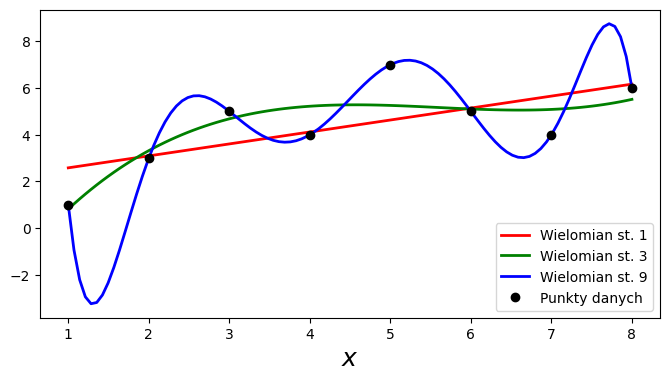

In [6]:
xData = np.array([1, 2, 3, 4, 5, 6, 7, 8])
yData = np.array([1, 3, 5, 4, 7, 5, 4, 6])

f1 = P.Polynomial.fit(xData, yData, 1)
f2 = P.Polynomial.fit(xData, yData, 3)
f3 = P.Polynomial.fit(xData, yData, 8)

x = np.linspace(xData.min(), xData.max(), 100)

fig, ax = plt.subplots(1, 1, figsize=(8, 4))

ax.plot(x, f1(x), 'r', lw=2, label='Wielomian st. 1')
ax.plot(x, f2(x), 'g', lw=2, label='Wielomian st. 3')
ax.plot(x, f3(x), 'b', lw=2, label='Wielomian st. 9')
ax.plot(xData, yData, 'ko', label='Punkty danych')

ax.legend(loc=4)
ax.set_xlabel(r"$x$", fontsize=18);

## <a id='toc1_3_'></a>[Interpolacja i aproksymacja dowolną krzywą](#toc0_)

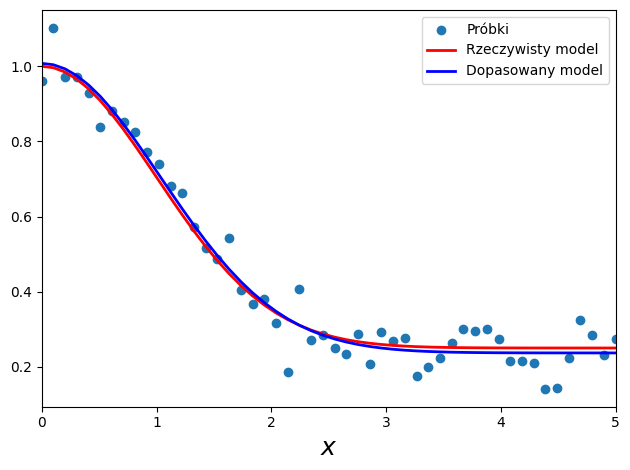

In [8]:
f = lambda x, b0, b1, b2: b0 + b1 * np.exp(-b2 * x**2)

x = np.linspace(0, 5, 50)
y = f(x, 0.25, 0.75, 0.5)
ydata = y + 0.05 * np.random.randn(len(x))

beta_opt, beta_cov = optimize.curve_fit(f, x, ydata)

fig, ax = plt.subplots()
ax.scatter(x, ydata, label="Próbki")
ax.plot(x, y, 'r', lw=2, label="Rzeczywisty model")
ax.plot(x, f(x, *beta_opt), 'b', lw=2, label="Dopasowany model")
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.legend()
fig.tight_layout();

## <a id='toc1_4_'></a>[Interpolacja funkcjami sklejanymi](#toc0_)

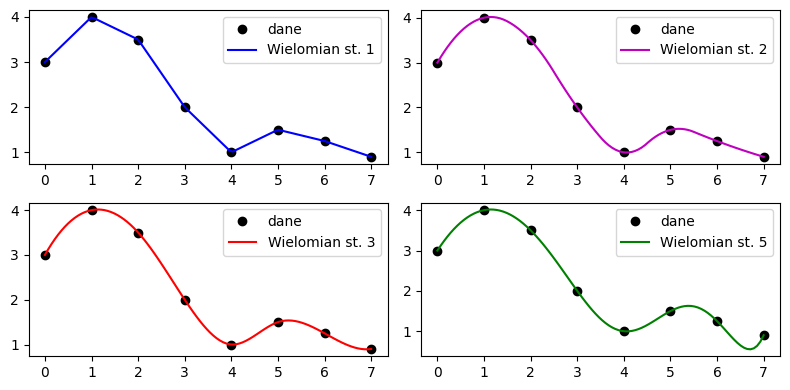

In [76]:
x = np.array([0, 1, 2, 3, 4, 5, 6, 7])
y = np.array([3, 4, 3.5, 2, 1, 1.5, 1.25, 0.9])

x = np.linspace(x.min(), x.max(), 100)

fig, axes = plt.subplots(2, 2, figsize=(8, 4))

for ax, n, c in zip(axes.flat, [1, 2, 3, 5], ['b', 'm', 'r', 'g']):
    f = interpolate.interp1d(x, y, kind=n)
    ax.plot(x, y, 'ko', label='dane')
    ax.plot(x, f(x), color=c, label=f'Wielomian st. {n}')
    ax.legend()

fig.tight_layout();

## <a id='toc1_5_'></a>[Interpolacja funkcji wielu zmiennych](#toc0_)

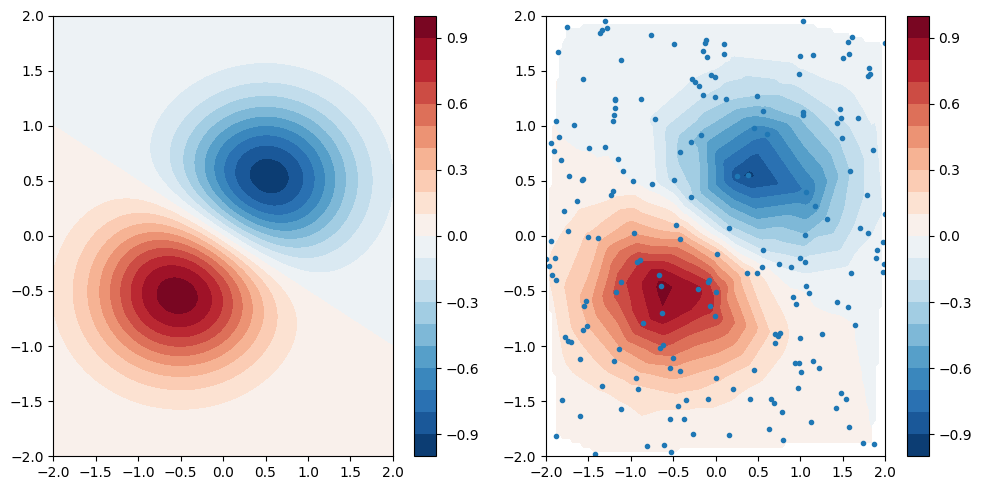

In [8]:
### dokładne wartości funcji
f = lambda x, y: np.exp(-(x+.5)**2-2*(y+.5)**2)-np.exp(-(x-.5)**2-2*(y-.5)**2)
x_min = -2; x_max = 2
y_min = -2; y_max = 2

x = np.linspace(x_min, x_max, 100)
y = np.linspace(y_min, y_max, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

### dane pomiarowe
N = 200
xdata = np.random.uniform(x_min, x_max, N)
ydata = np.random.uniform(y_min, y_max, N)
zdata = f(xdata, ydata)

### interpolacja
Z_interp = interpolate.griddata((xdata, ydata), zdata, (X, Y), method='linear')

### rysowanie
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
c = ax[0].contourf(X, Y, Z, 20, cmap=plt.cm.RdBu_r);
cb = fig.colorbar(c, ax=ax[0])

c = ax[1].contourf(X, Y, Z_interp, 20, cmap=plt.cm.RdBu_r);
ax[1].scatter(xdata, ydata, marker='.')
cb = fig.colorbar(c, ax=ax[1])

fig.tight_layout();

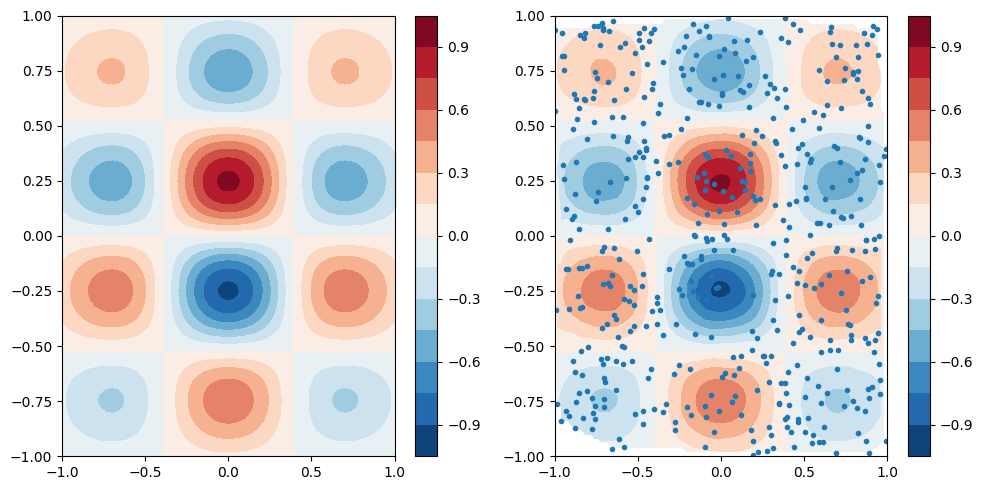

In [9]:
### dokładne wartości funcji
f = lambda x, y: np.exp(-x**2 - y**2) * np.cos(4*x) * np.sin(6*y)
x = y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

### dane pomiarowe
N = 500
xdata = np.random.uniform(-1, 1, N)
ydata = np.random.uniform(-1, 1, N)
zdata = f(xdata, ydata)

### interpolacja
Z_interp = interpolate.griddata((xdata, ydata), zdata, (X, Y), method='cubic')

### rysowanie
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
c = ax[0].contourf(X, Y, Z, 15, cmap=plt.cm.RdBu_r);
cb = fig.colorbar(c, ax=ax[0])

c = ax[1].contourf(X, Y, Z_interp, 15, cmap=plt.cm.RdBu_r);
ax[1].scatter(xdata, ydata, marker='.')
cb = fig.colorbar(c, ax=ax[1])

fig.tight_layout();